# MLS Toyblocks Demo 

Notebook creator: Hannah Weiser & Sina Zumstein, 2023

This demo scene uses 3D models of toyblocks, which will be scanned by ground-based mobile laser scanning (MLS). We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point cloud.

In [1]:
import sys, os
from pathlib import Path
from IPython.display import Code

current_folder = globals()["_dh"][0]
helios_path = str(Path(current_folder).parent)
sys.path.append(helios_path)  # add helios-plusplus directory to PATH
import pyhelios

from pyhelios.util.xmldisplayer import display_xml, find_playback_dir
os.chdir(helios_path)

## Survey
Lets's have a look at the XML files in the simulation. First, we investigate the **survey** XML file, `mls_toyblocks.xml`:

In [2]:
Code(display_xml(r'data\surveys\toyblocks\mls_toyblocks.xml'), language='XML')

<document>
	<survey name="toyblocks_mls" platform="data/platforms.xml#vmx-450-car-middle" scanner="data/scanners_als.xml#riegl_vux-1uav" scene="data/scenes/toyblocks/toyblocks_scene.xml#toyblocks_scene">
	<!-- platform: car, deflector: rotating -->
	
		<leg>
			<platformSettings x="-3.5" y="65.0" z="0.000" onGround="true" movePerSec_m="20" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="195" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="-25.0" y="-30.0" z="0.000" onGround="true" movePerSec_m="20" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="195" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
				<leg>
			<platformSettings x="1.0" y="-30.0" z="0.000" onGround="true" movePerSec_m="20" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="195" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="31.0" y="0.0" z="0.0" onGround="true" movePerSec_m="20" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="195" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="73.5" y="0.0" z="0.0" onGround="true" movePerSec_m="20" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="195" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" />
		</leg>
	</survey>
</document>

We can see, that there are five `leg`elements, that define the waypoints of the vehicle around the object to be scanned. Here only `x` and `y` values are important. As `onGround` is set to "true", the platform is automatically placed on the ground object. In total there are four lines the vehicle will drive along. The `movePerSec_m` parameter indicates the speed between these waypoints. Furthermore, we see that the `vmx-450-car-middle` platform in `data/platforms.xml` is referenced, so let's have a look at that next:

## Platform

In [3]:
Code(display_xml(r'data\platforms.xml', 'vmx-450-car-middle'))

<platform id="vmx-450-car-middle" name="RIEGL VMX-450 Car Middle" type="linearpath">
		<scannerMount x="0.0" y="-2.2" z="2.2">
			<rot axis="x" angle_deg="110" />
			<rot axis="z" angle_deg="0" />		
		</scannerMount>
		<!--<positionXNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<positionYNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<positionZNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<attitudeXNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>
		<attitudeYNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>
		<attitudeZNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>-->
	</platform>

why linearpath?

# Scanner 
Next we will have a look at the scanner that is placed on the platform. Here it is the `riegl_vux-1uav` defined in data/scanners_als.xml as shown in the survey XML.

In [4]:
Code(display_xml(r'data/scanners_als.xml','riegl_vux-1uav'))

<scanner id="riegl_vux-1uav" accuracy_m="0.01" beamDivergence_rad="0.0005" name="RIEGL VUX-1UAV" optics="rotating" pulseFreqs_Hz="50000,100000,200000,300000,380000,550000" pulseLength_ns="4" rangeMin_m="3" scanAngleMax_deg="180" scanAngleEffectiveMax_deg="165" scanFreqMin_Hz="10" scanFreqMax_Hz="200">
		
			<beamOrigin x="0" y="0.085" z="0.06">			
				<rot axis="x" angle_deg="90" />			
				<rot axis="z" angle_deg="90" />			
			</beamOrigin>
		<headRotateAxis x="0" y="0" z="1" />
	</scanner>

Here we can see the scanner-specific settings, for example `beamDivergence_rad`, the `accuracy` or the possible pulse frequencies (`pulseFreqs_Hz`). This scanner has an rotating beam deflector (`optics`).

# Scene
Now we will have a look at the scene, `toyblocks_scene` in `data/scenes/toyblocks/toyblocks_scene.xml`:

In [5]:
Code(display_xml(r'data/scenes/toyblocks/toyblocks_scene.xml', 'toyblocks_scene'))

<scene id="toyblocks_scene" name="ToyblocksScene">
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/groundplane/groundplane.obj" />
            </filter>
            <filter type="scale">
                <param type="double" key="scale" value="70" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="20.0;0;0" />
			</filter>
        </part>
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="1" />
            </filter>
        </part>
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
            </filter>
			<filter type="rotate">
				<param key="rotation" type="rotation">
					<rot angle_deg="45" axis="z" />
				</param>
			</filter>
			<filter type="scale">
                <param type="double" key="scale" value="0.5" />
            </filter>
			<filter type="translate">
				<param type="integer" key="onGround" value="-1" />
				<param type="vec3" key="offset" value="-45.0;10.0;10" />
			</filter>
        </part>
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/sphere.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="0.5" />
            </filter>
        </part>
         <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cylinder.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="1" />
            </filter>
        </part>
    </scene>

Here we see different objects, which compose the scene: the `groundplane.obj`, `cube.obj` twice, `sphere.obj` and the `cylinder.obj`. The second `cube.obj` is rotated. The `sphere.obj` is scaled. Tp load them, the `objloader` filter is being used.

# Executing the Simulation 
Next, we will run the simulation. In Jupyter Notebooks, we can run external commands with the !command syntax, but you can also just run it from the command line.

In [6]:
!"run/helios.exe" data\surveys\toyblocks\mls_toyblocks.xml -q

## The results
Now we can display a 3D plot

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

output_path = find_playback_dir(r"data\surveys\toyblocks\mls_toyblocks.xml")

print("Loading points from", output_path)

strip_1 = np.loadtxt(Path(output_path) / 'leg000_points.xyz')
strip_2 = np.loadtxt(Path(output_path) / 'leg001_points.xyz')
strip_3 = np.loadtxt(Path(output_path) / 'leg002_points.xyz')
strip_4 = np.loadtxt(Path(output_path) / 'leg003_points.xyz')

traj_1 = np.loadtxt(Path(output_path) / 'leg000_trajectory.txt')
traj_2 = np.loadtxt(Path(output_path) / 'leg001_trajectory.txt')
traj_3 = np.loadtxt(Path(output_path) / 'leg002_trajectory.txt')
traj_4 = np.loadtxt(Path(output_path) / 'leg003_trajectory.txt')
traj = np.vstack((traj_1[:, :3], traj_2[:, :3], traj_3[:, :3], traj_4[:, :3]))

Loading points from H:\helios4pyhelios\helios\output\toyblocks_mls\2023-02-02_23-01-56


In [8]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius]) 
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

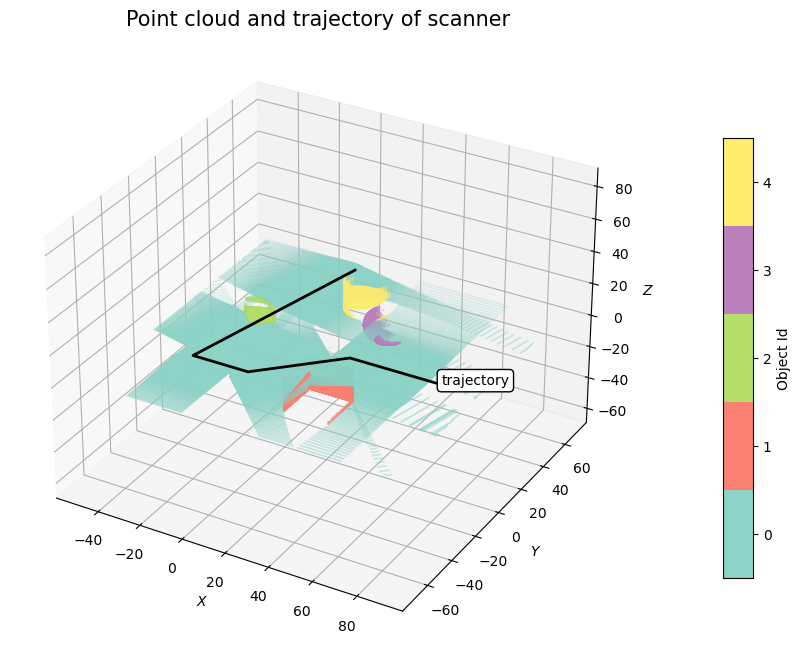

In [9]:
# Matplotlib figure.
fig = plt.figure(figsize=(12,8))
# Axes3d axis onto mpl figure.
ax = fig.add_subplot(projection='3d', computed_zorder=False)

#settings for a discrete colorbar
N = 5
cmap = plt.get_cmap('Set3', N)

# Scatter plot of points (coloured by HitObjectId)
sc = ax.scatter(strip_1[:, 0], strip_1[:, 1], strip_1[:, 2], c=strip_1[:, 8], cmap=cmap, s=0.02, zorder=1)
sc = ax.scatter(strip_2[:, 0], strip_2[:, 1], strip_2[:, 2], c=strip_2[:, 8], cmap=cmap, s=0.02, zorder=1)
sc = ax.scatter(strip_3[:, 0], strip_3[:, 1], strip_3[:, 2], c=strip_3[:, 8], cmap=cmap, s=0.02, zorder=1)
sc = ax.scatter(strip_4[:, 0], strip_4[:, 1], strip_4[:, 2], c=strip_4[:, 8], cmap=cmap, s=0.02, zorder=1)

# Plot of trajectory.
ax.plot(traj[:,0], traj[:,1], traj[:,2], c='black', linewidth=2, zorder=2)

cax = plt.axes([0.85, 0.2, 0.025, 0.55])
cbar = plt.colorbar(sc, cax=cax, ticks=[2/5, 6/5, 2, 2+4/5,4-2/5])
cbar.ax.set_yticklabels(['0', '1', '2', '3', '4'])
cbar.set_label("Object Id")

# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

set_axes_equal(ax)    

# Set title.
ax.set_title(label='Point cloud and trajectory of scanner', fontsize=15)
ax.text(traj[-1,0], traj[-1,1], traj[-1,2], 'trajectory',
        bbox = dict(boxstyle='round', fc="w", ec="k"), size = '10')

# Display results
plt.show()